In [2]:

# === COURSE REPO SETUP === #

# 1. ENTER your GitHub username (the one that owns your fork)
github_username = "ArmandoADJ"

# 2. Name of the repo (don't change unless your fork name is different)
repo_name = "STAT-7220-Applied-Experimental-Design"

# 3. Build the full repo URL for cloning
repo_url = f"https://github.com/{github_username}/{repo_name}.git"

import os

# --- Detect if we're already in a repo ---
cwd = os.getcwd()
if cwd.endswith(repo_name):
    print(f"✅ Already inside repo folder: {cwd}")
else:
    # --- If the repo folder exists, check if it's nested ---
    if os.path.exists(repo_name):
        print(f"⚠️ Found existing folder '{repo_name}'. Skipping clone to avoid nesting.")
    else:
        print(f"📥 Cloning repo from {repo_url}...")
        os.system(f"git clone {repo_url}")

    # --- Change to repo directory ---
    if os.path.exists(repo_name):
        os.chdir(repo_name)
        print(f"📂 Changed directory to: {os.getcwd()}")
    else:
        print("❌ ERROR: Repo folder not found. Please check your GitHub username.")

# --- Check if this is the instructor's repo instead of student's fork ---
# This command needs to be run from within the repository directory
remote_url = os.popen("git config --get remote.origin.url").read().strip()

if "abrown9008" in remote_url:
  print("⚠️ WARNING: You are working in the instructor's repo, not your fork!")
  print("💡 Please fork the repo to your own account and update `github_username` above.")
else:
    print(f"🔗 Connected to fork at: {remote_url}")

# Set Today's Directory #

today_dir = "Assignments/HW3"
os.chdir(today_dir)
print(f"📂 Changed directory to: {os.getcwd()}")

✅ Already inside repo folder: /content/STAT-7220-Applied-Experimental-Design
🔗 Connected to fork at: https://github.com/ArmandoADJ/STAT-7220-Applied-Experimental-Design.git
📂 Changed directory to: /content/STAT-7220-Applied-Experimental-Design/Assignments/HW3


# STAT 7220 - Homework 3
## Factorial Designs
## Dr. Austin Brown
## Due Date: November 21, 2025

## Part 1 Instructions:

A running shoe manufacturer wants to optimize the comfort of a new shoe model. They've identified three factors they believe will affect comfort:

| Factor | Level 1 (-) Description | Level 2 (+) Description |
|------------------------|------------------------|-------------------------|
| Sole Material (A) | Standard EVA foam | Advanced gel-infused foam |
| Insole Thickness (B) | 3mm | 6mm |
| Fabric Breathability (C) | Standard woven fabric | High-performance mesh fabric |

To evaluate the comfort of the $2^3=8$ runs, the manufacturer will recruit 3 NCAA division one cross-country athletes to test a randomly assigned shoe. Each athlete will run on a treadmill for 30 minutes in the shoes and rate the comfort on a scale of 1-10 (1 = very uncomfortable, 10 = very comfortable). The results of this experiment are contained in the `Shoe Comfort Experiment.xlsx` file. With these data, I want you to:

1.  Briefly describe the objective of the experiment.
The Objective of this experiment is to test which are the factors that contributes to a more comfortable running shoe.


2.  Specify the outcome variable and how it is measured.
The Outcome variable is Comfort, its Categorical Ordinal Variable and it ranges from 1 to 10 where 1 is very uncomfortable and 10 very comfortable.

3.  Specify the independent variables. What lurking variables may be present?

The independent variables are the following: Sole Material, Insole Thickness, Fabric Breathability.

Possible lurking variable will be type of foot, if a certain athetle requires an specifc type of shoe if it was not accounted for during the study design, the real values may be affected.

4.  Explain the difference between a full factorial design and a $2^k$ factorial design. Briefly comment on why the latter may be preferred in this case.

The difference is mainly on that $2^k$ factorial design allows to design experiment in an efficient manner, in cases where you are not sure of how many units to build to test the main effects and interaction $2^k$ factorial designs provide a cost efficient solution.


5.  State the sets of null and alternative hypotheses for this experiment.

Note: I have my doubts regarding if considering the main treatment effects or means if there's no interaction at this point.

**Main Effects or means**

$H_{00}^A$: There's no difference in the Comfort means between Standard EVA Foam and advance gel infused foam.

$H_{01}^A$: The means differs.

$H_{10}^B$: There's no difference in the Comfort means between Insole thickness of 3mm and 6mm.

$H_{11}^B$: The means differs.

$H_{20}^C$: There's no difference in the Comfort means between Standard Woven Fabric Foam and High Performance Fabric.

$H_{21}^C$: The means differs.

**Interactions:**

Two Way Interactions:

$H_0^{AB}$: $\beta_{sole Material}$ = $\beta_{Sole Thickness}$

$H_1^{AB}$: The effects are not equal.

$H_0^{AC}$: $\beta_{sole Material}$ = $\beta_{breathability}$

$H_1^{AC}$: The effects are not equal.

$H_0^{BC}$: $\beta_{Sole Thickness}$ = $\beta_{breathability}$

$H_1^{BC}$: The effects are not equal.
Three-Way Interactions:

$H_0^{ABC}$: The Effects of the three interaction is equal to 0

$H_1^{ABC}$: The Effects are not equal.

6.  Perform appropriate exploratory analysis, including data visualizations. Do the results of these analyses support the null or alternative hypotheses more strongly?

The results supports the alternative hypothesis were factors effects are not equal.

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 204.4/204.4 kB 4.0 MB/s eta 0:00:00
  sole_material insole_thickness breathability   comfort
0           EVA              3mm         Woven  6.373546
1           EVA              3mm         Woven  7.183643
2           EVA              3mm         Woven  6.164371
3           EVA              3mm          Mesh  7.595281
4           EVA              3mm          Mesh  6.329508
5           EVA              3mm          Mesh  5.179532
                   mean       std  count
sole_material                           
EVA            7.093638  1.076122     12
Gel            9.043596  1.545309     12
                      mean       std  count
insole_thickness                           
3mm               7.441465  1.387030     12
6mm               8.695768  1.684642     12
                   mean       std  count
breathability                           
Mesh           7.504218  1.272221     12
Woven          8.633016  1.818369     12
                 

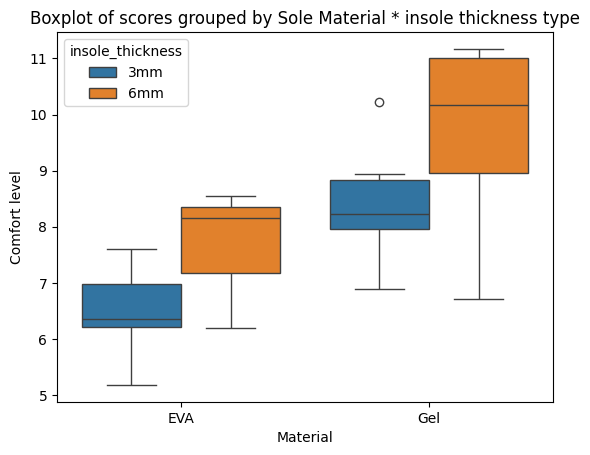

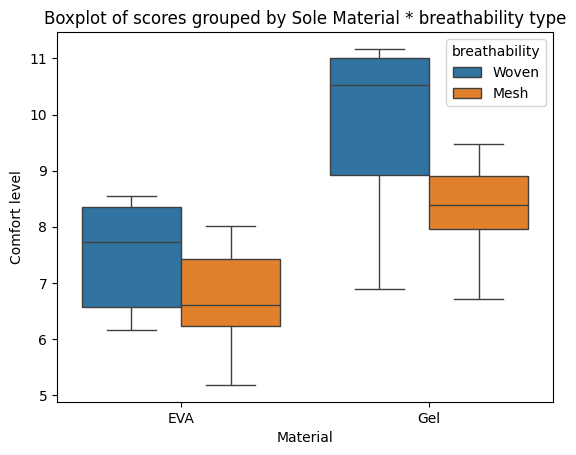

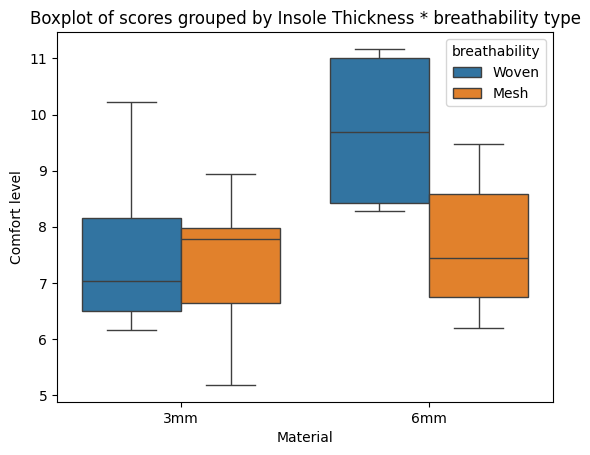

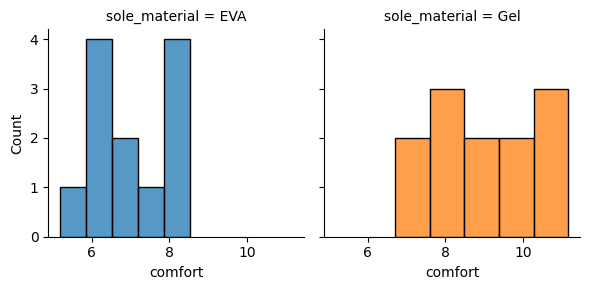

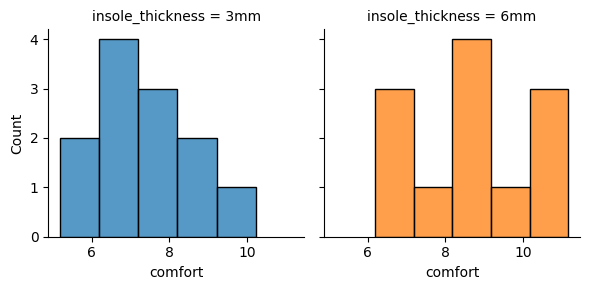

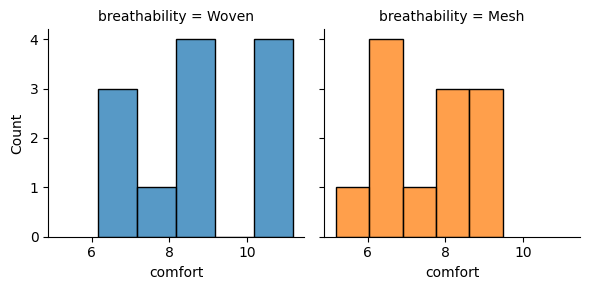

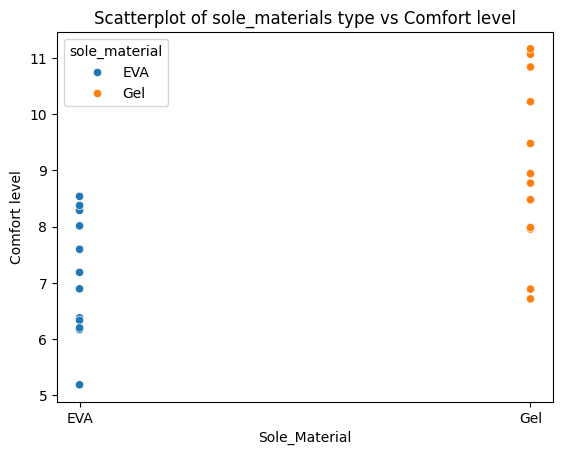

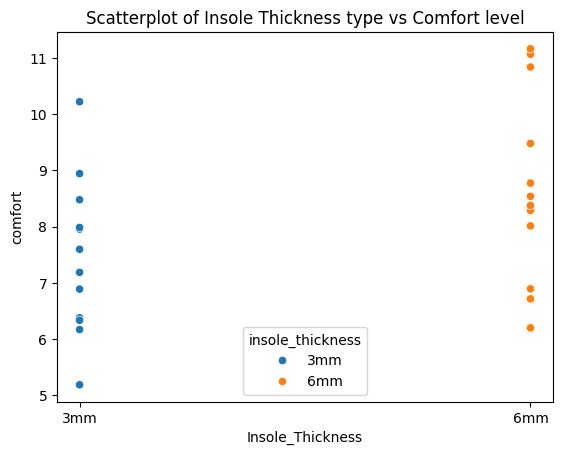

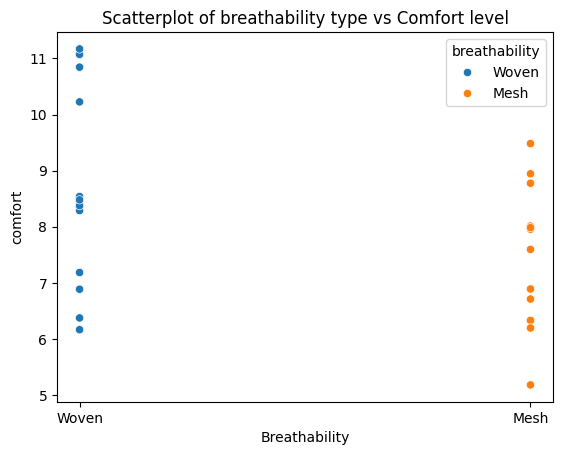

In [52]:
## Question 6 Code ##
#Import necessary Libraries#
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.diagnostic import het_breuschpagan
from scipy import stats
#%pip install pingouin
import pingouin as pg
#Load dataset#
data_path = "/content/STAT-7220-Applied-Experimental-Design/Assignments/HW3/Shoe Comfort Experiment.xlsx"
df = pd.read_excel(data_path)

#Print 6 first rows
print(df.head(6))

###Descriptive and Quantitative results###
##Main Effects##
#Sole Materials#
print(df.groupby(["sole_material"])["comfort"].agg(["mean","std","count"]))

#Insole Thickness#
print(df.groupby(["insole_thickness"])["comfort"].agg(["mean","std","count"]))

#Breathability#
print(df.groupby(["breathability"])["comfort"].agg(["mean","std","count"]))

##Two-Way Interactions##
#Sole Material * Insole Thickness
print(df.groupby(["sole_material","insole_thickness"])["comfort"].agg(["mean","std","count"]))

#Sole Material * Breathability
print(df.groupby(["sole_material","breathability"])["comfort"].agg(["mean","std","count"]))

#Breathability * Insole Thickness
print(df.groupby(["breathability","insole_thickness"])["comfort"].agg(["mean","std","count"]))

##Three-Way Interactions#
print(df.groupby(["sole_material", "insole_thickness", "breathability"])["comfort"].agg(["mean","std","count"]))

print("\n")

###Visualizations###

##Boxplots##
#Boxplots of sole material * insole thickness
sns.boxplot(data = df, x = "sole_material", y = "comfort", hue= "insole_thickness")
plt.title("Boxplot of scores grouped by Sole Material * insole thickness type")
plt.xlabel("Material")
plt.ylabel("Comfort level")
plt.show()

print("\n")

#Boxplots of sole material * breathability
sns.boxplot(data = df, x = "sole_material", y = "comfort", hue= "breathability")
plt.title("Boxplot of scores grouped by Sole Material * breathability type")
plt.xlabel("Material")
plt.ylabel("Comfort level")
plt.show()

print("\n")

#Boxplots of insole thickness * breathability
sns.boxplot(data = df, x = "insole_thickness", y = "comfort", hue= "breathability")
plt.title("Boxplot of scores grouped by Insole Thickness * breathability type")
plt.xlabel("Material")
plt.ylabel("Comfort level")
plt.show()

print("\n")

##Histograms##
#Histogram of Sole Material#
facet = sns.FacetGrid(df, col = "sole_material", hue = "sole_material")
facet.map(sns.histplot, "comfort")
plt.show()

print("\n")

#Histogram insole thickness#
facet = sns.FacetGrid(df, col = "insole_thickness", hue = "insole_thickness")
facet.map(sns.histplot, "comfort")
plt.show()

print("\n")

#Histogram breathability#
facet = sns.FacetGrid(df, col = "breathability", hue = "breathability")
facet.map(sns.histplot, "comfort")
plt.show()

print("\n")

##Scatterplots##
#Scatterplots of Sole Materials vs comfort#
sns.scatterplot(data = df, x = "sole_material", y = "comfort", hue = "sole_material")
plt.title("Scatterplot of sole_materials type vs Comfort level")
plt.xlabel("Sole_Material")
plt.ylabel("Comfort level")
plt.show()

print("\n")

#Scatterplots of Insole Thickness vs comfort#
sns.scatterplot(data = df, x = "insole_thickness", y = "comfort", hue = "insole_thickness")
plt.title("Scatterplot of Insole Thickness type vs Comfort level")
plt.xlabel("Insole_Thickness")
plt.show()

print("\n")

#Scatterplots of breathability vs comfort#
sns.scatterplot(data = df, x = "breathability", y = "comfort", hue = "breathability")
plt.title("Scatterplot of breathability type vs Comfort level")
plt.xlabel("Breathability")
plt.show()

print("\n")

7.  Fit a full factorial ANOVA model to the data. Assess the normality assumption using both a visual method and a testing method. Do we have evidence to support the assumption of normality? Why or why not?
After obtaining Rstudentized residuals and plotting all necessary visualizations and testing using the recommended statistics, the residuals demonstrate enough evidence to support the normality assumption.

QQplot $R^2$: 0.9475 strong R square. Skewness: -0.127
Kurtosis: 0.271 supporting normality, Shapiro Wilks Test:p-value = 0.31 supporting normality. Histogram looks roughly normal, symmetric around the mean, no long tails,

                            OLS Regression Results                            
Dep. Variable:                comfort   R-squared:                       0.747
Model:                            OLS   Adj. R-squared:                  0.637
Method:                 Least Squares   F-statistic:                     6.755
Date:                Thu, 20 Nov 2025   Prob (F-statistic):           0.000786
Time:                        01:09:46   Log-Likelihood:                -28.908
No. Observations:                  24   AIC:                             73.82
Df Residuals:                      16   BIC:                             83.24
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                                                          coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------

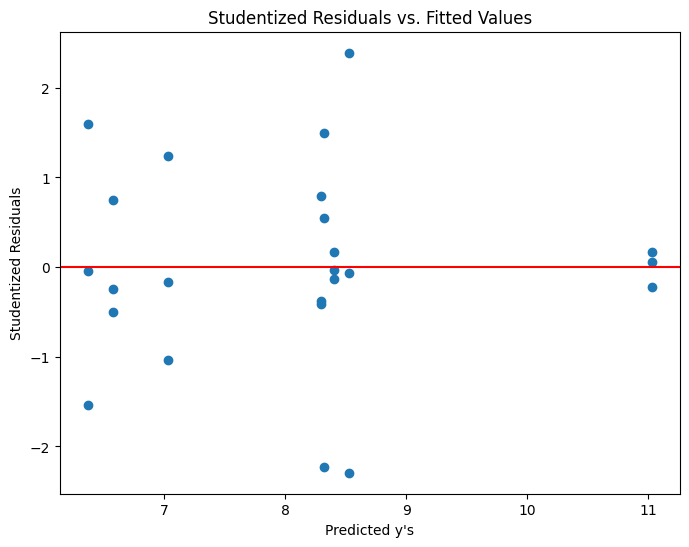

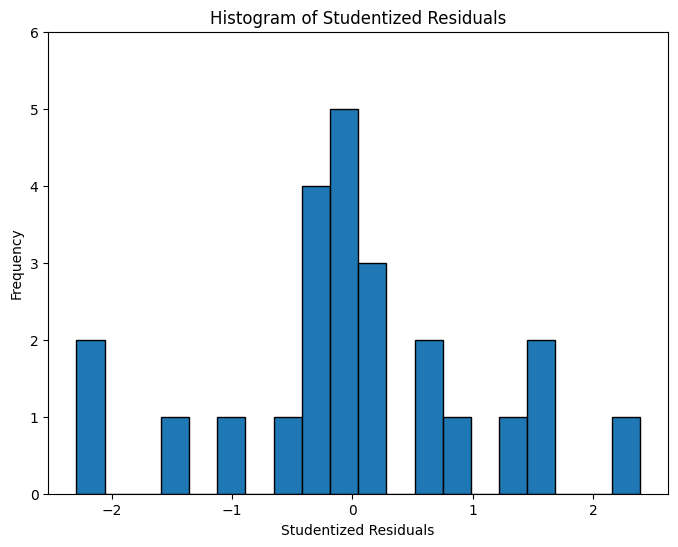

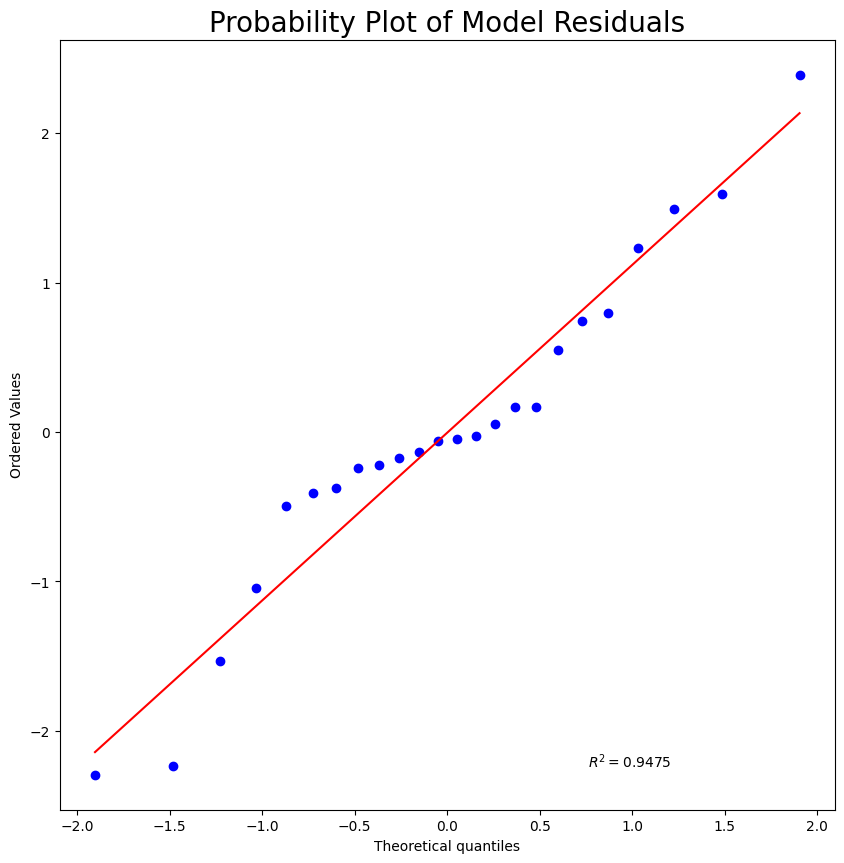



ShapiroResult(statistic=np.float64(0.953335815948645), pvalue=np.float64(0.31947487780856865))


Skewness: -0.12796494671742906
Kurtosis: 0.2719351142805624


In [48]:
## Question 7 Code ##

#Build Model#
ols_model = ols("comfort ~ sole_material * insole_thickness * breathability", data = df).fit()
print(ols_model.summary())

print("\n")

#Extract Rstudentized Residuals#
studentized_residuals_fitted = pd.DataFrame({
    "studentized_residuals" : ols_model.get_influence().resid_studentized_external,
    "fitted_values" : ols_model.fittedvalues})

##Visualization of Assumptions##
#Scatterplot
plt.figure(figsize=(8, 6))
plt.scatter( x=  studentized_residuals_fitted["fitted_values"],
            y = studentized_residuals_fitted["studentized_residuals"])
plt.axhline(y=0, linestyle='solid', color='red')
plt.xlabel("Predicted y's")
plt.ylabel("Studentized Residuals")
plt.title("Studentized Residuals vs. Fitted Values")
plt.show()

print("\n")

#Plot Histogram#
plt.figure(figsize=(8, 6))
plt.hist(studentized_residuals_fitted["studentized_residuals"], bins=20, edgecolor='black')
plt.xlabel("Studentized Residuals")
plt.ylabel("Frequency")
plt.title("Histogram of Studentized Residuals")
plt.ylim(0,6)
plt.show()

print("\n")

#QQPlot#
fig = plt.figure(figsize= (10, 10))
ax = fig.add_subplot(111)

normality_plot, stat = stats.probplot(studentized_residuals_fitted["studentized_residuals"], plot=plt, rvalue=True)
ax.set_title("Probability Plot of Model Residuals", fontsize=20)
ax.set
plt.show()

print("\n")

#Quantitative Assumptions
#Shapiro Wilk's test
print(stats.shapiro(studentized_residuals_fitted["studentized_residuals"]))

print("\n")

#Skewness and kurtosis

Skewness_values = stats.skew(studentized_residuals_fitted["studentized_residuals"])
Kurtosis_values = stats.kurtosis(studentized_residuals_fitted["studentized_residuals"])

print(f"Skewness: {Skewness_values}")
print(f"Kurtosis: {Kurtosis_values}")



8.  Assess the constant variance assumption using both a visual method and a testing method. Do we have evidence to support the assumption of constant variance? Why or why not?

Yes. Residuals seem randomly distributed and symmetric accross the mean value, and Breuch-Pagan test p-value is non significant therefore it can be concluded that the residuals support the assumtion of homegenity of variance or hesteroskedacity.





In [49]:
## Question 8 Code ##
#Breuch-Pagan Test
bp_test = het_breuschpagan(studentized_residuals_fitted["studentized_residuals"],
                           ols_model.model.exog)
print(bp_test)

print("\n")

(np.float64(12.0946984989491), np.float64(0.09748735032869661), np.float64(2.3220768611374365), np.float64(0.0772192837807506))





9.  Report the F-statistics and their associated p-values from the factorial ANOVA model. What conclusions can we draw about our main effects? Our two-way interactions? Our three-way interaction?

F-Statistic(7,16) = 6.755, p-value = 0.007, $R^2$: 0.637.

Between our main Effects only Sole Material gel is significant meaning supporting the alternative hypothesis. P-value <0.05.

None of the interactions are significant meaning that the effect of each variable in the outcomes is independent.


In [ ]:
## Question 9 Code ##


10. Calculate and interpret the partial $\eta^2$ values for each of the main effects and interactions. Which effects and/or interactions are most important? Why?

The main effect are considered the ones that explains the most amount of variance in the model. With Sole_material explaining the biggest amount of variance in the model.

Meanwhile for the interactions apart from insole_thickness*breathability , the other interactions seems to have not a weak effect size meaning that the interactions doesn't add explanatory power to the model.


In [54]:
## Question 10 Code ##
mod_p = pg.anova(dv='comfort',between=["sole_material", "insole_thickness", "breathability"],data=df,effsize="np2").round(4)

print(mod_p[["Source","np2"]])


                                             Source     np2
0                                     sole_material  0.5934
1                                  insole_thickness  0.3765
2                                     breathability  0.3285
3                  sole_material * insole_thickness  0.0000
4                     sole_material * breathability  0.0429
5                  insole_thickness * breathability  0.2405
6  sole_material * insole_thickness * breathability  0.0394
7                                          Residual     NaN



11. Summarize your conclusions. Which combination of factors would you recommend to the shoe manufacturer? Why?
The model is statistically significant.
F-Statistic(7,16) = 6.755, p-value = 0.007, $R^2$: 0.637.

Effect wise the only factor thats statistically different is sole material when comparing Standard Eva foam vs advanced gel-infused foam P-value <0.05

The interaction didn't present any statistical difference on the magnitude of the effects. P-value >0.05.

The study suggest that only the Gel soles causes a significant increase on how the athetles perceive the running shoes. Therefore statistically speaking to manufacture a more comfortable shoe the right choice is Gel soles.






## PART 2 INSTRUCTIONS:
The same company is interested in developing a new GPS-enabled fitness band for runners. They want to maximize user satisfaction and have identified three key factors:

| Run | GPS Accuracy (A) | Battery Life (B) | Display (C) |
|-----|------------------|------------------|-------------|
| 1   | \- (Standard)    | \- (6 hours)     | \- (Small)  |
| 2   | \+ (High)        | \- (6 hours)     | \+ (Large)  |
| 3   | \- (Standard)    | \+ (12 hours)    | \+ (Large)  |
| 4   | \+ (High)        | \+ (12 hours)    | \- (Small)  |

Due to time and resource limitations, the company would rather conduct a $2^{3-1}$ fractional factorial experiment. For each of the above runs, the company will recruit 3 NCAA division one cross-country athletes to test a randomly assigned fitness band. Each athlete will use the band for one month during their competition season. At the end of the month, the athletes will be asked to rate their level of satisfaction on a scale of 1-10 (1 = very dissatisfied, 10 = very satisfied). The results of this experiment are contained in the `Fitness Band Experiment.xlsx` file. With these data, I want you to:

1.  Briefly describe the objective of the experiment.

2.  Specify the outcome variable and how it is measured.

3.  Specify the independent variables. What lurking variables may be present?

4.  Explain the difference between a full $2^k$ factorial design and a $2^{3-1}$ fractional factorial design. Briefly comment on why the latter may be preferred in this case.

5.  State the sets of null and alternative hypotheses for this experiment.

6.  Assuming a defining relation of $I=ABC$, specify the aliasing structure of the design. What does this mean for the interpretation of the main effects and interactions?

7.  Perform appropriate exploratory analysis, including data visualizations. Do the results of these analyses support the null or alternative hypotheses more strongly?


In [ ]:
## Question 7 Code ##


8.  Fit the appropriate ANOVA model to the data. Assess the normality assumption using both a testing method and a visual method. Do we have evidence to support the assumption of normality? Why or why not?


In [ ]:
## Question 8 Code ##


9.  Assess the constant variance assumption using both a testing method and a visual method. Do we have evidence to support the assumption of constant variance? Why or why not?


In [ ]:
## Question 9 Code ##

10. Report the F-statistics and their associated p-values from the factorial ANOVA model. What conclusions can we draw about our main effects?

In [ ]:
## Question 10 Code ##

11. Calculate and interpret the values for the main effects. Which effects seem more important? Why?

In [ ]:
## Question 11 Code ##

12. Calculate and interpret the partial $\eta^2$ values for each of the main effects. Which effects are most important? Why?

In [ ]:
## Question 12 Code ##

13. Summarize your conclusions. Which combination of factors would you recommend to the fitness band manufacturer? Why?